In [17]:
!pip3 install scikit-learn

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Ensure NumPy is imported
from matplotlib import gridspec

# Load the dataset
dataset = pd.read_csv('creditcard.csv')

# Combine the first 5 and last 5 rows of the data
result = pd.concat([dataset.head(), dataset.tail()])
print(result)


            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.22

Fraudulent Cases: 492
Valid Transactions: 284315
Proportion of Fraudulent Cases: 0.1727%


C:\Users\Thin\AppData\Local\Temp\ipykernel_19620\1130855082.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


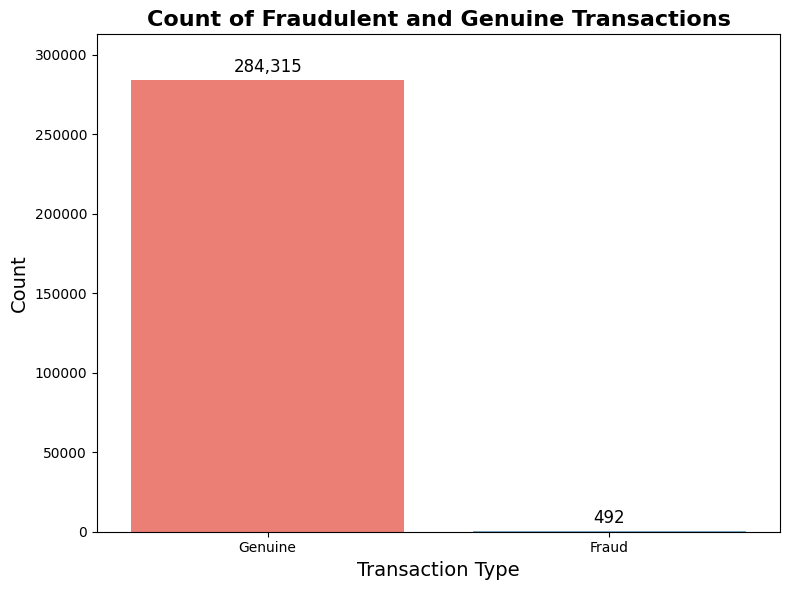

In [19]:
# Tính số lượng giao dịch gian lận và hợp lệ
fraud_cases = dataset[dataset["Class"] == 1].shape[0]
valid_cases = dataset[dataset["Class"] == 0].shape[0]
fraud_proportion = fraud_cases / dataset.shape[0]

# Hiển thị thông tin bằng f-string
print(f"Fraudulent Cases: {fraud_cases}")
print(f"Valid Transactions: {valid_cases}")
print(f"Proportion of Fraudulent Cases: {fraud_proportion:.4%}")  # Hiển thị tỷ lệ dưới dạng %

data_p = dataset.copy()
data_p["Transaction Type"] = np.where(data_p["Class"] == 1, "Fraud", "Genuine")

# Tính toán số lượng giao dịch cho từng loại
transaction_counts = data_p["Transaction Type"].value_counts()

# Tạo biểu đồ cột
plt.figure(figsize=(8, 6))
sns.barplot(
    x=transaction_counts.index, 
    y=transaction_counts.values, 
    palette=["#FF6F61", "#6BAED6"]  # Màu tùy chỉnh
)

# Thêm tiêu đề và nhãn trục
plt.title("Count of Fraudulent and Genuine Transactions", fontsize=16, fontweight="bold")
plt.xlabel("Transaction Type", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Hiển thị số lượng trên đầu mỗi cột
for i, count in enumerate(transaction_counts.values):
    plt.text(
        i, count + 5000,  # Vị trí text phía trên cột
        f"{count:,}",  # Format số với dấu phẩy
        ha="center", fontsize=12, color="black"
    )

# Cấu hình trục y
plt.ylim(0, transaction_counts.max() * 1.1)  # Thêm khoảng trống phía trên cột
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()
# Tạo biểu đồ cột


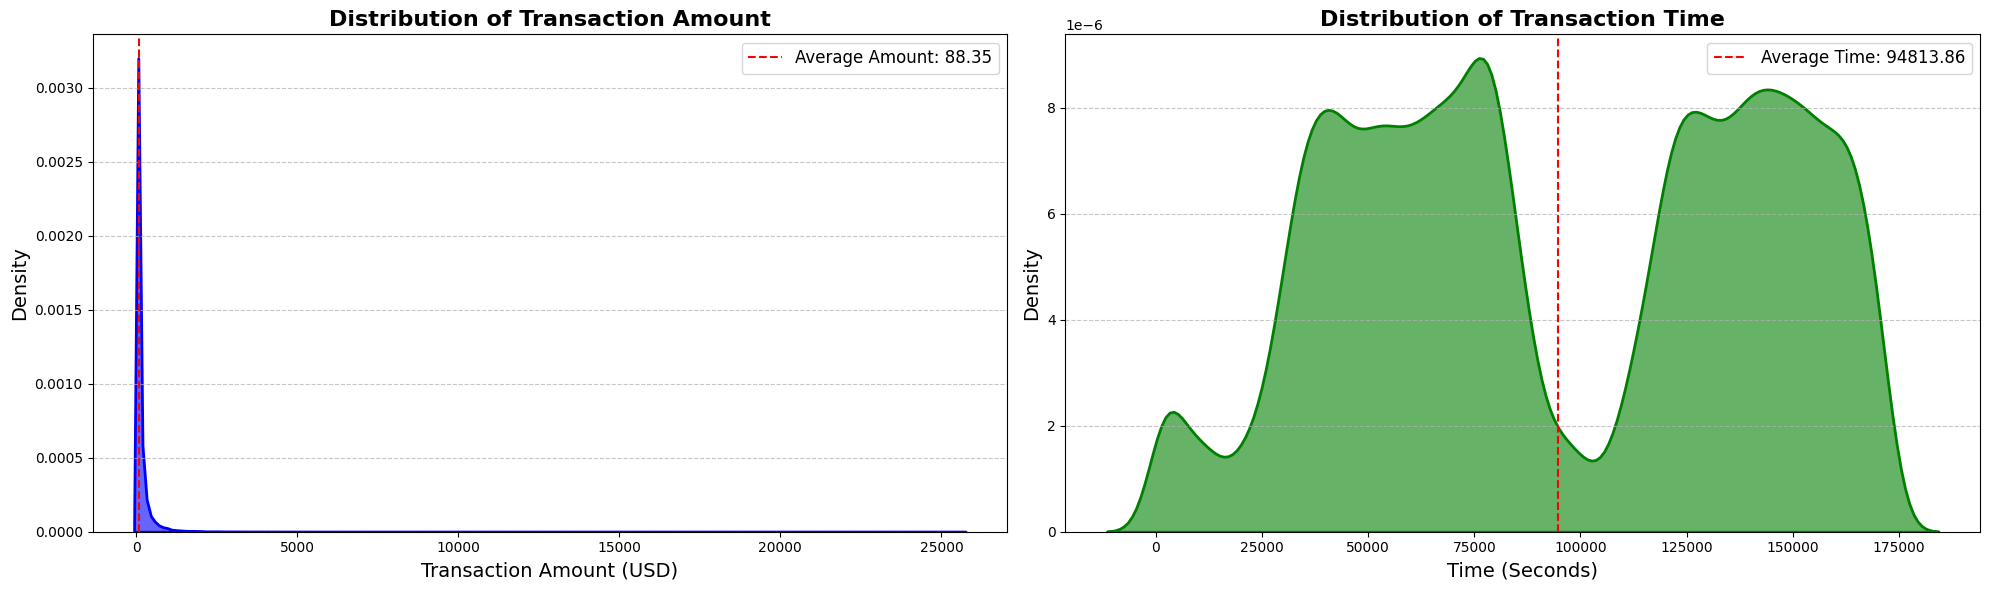

In [20]:
# Trích xuất các giá trị Amount và Time
amount_value = dataset['Amount'].values
time_value = dataset['Time'].values

# Tạo subplots với kích thước phù hợp và chia sẻ trục x
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharex=False)

# Biểu đồ KDE cho Amount
sns.kdeplot(amount_value, fill=True, color="blue", alpha=0.6, ax=axes[0], linewidth=2)
axes[0].set_title('Distribution of Transaction Amount', fontsize=16, fontweight="bold")
axes[0].set_xlabel('Transaction Amount (USD)', fontsize=14)
axes[0].set_ylabel('Density', fontsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)  # Thêm lưới ngang

# Tìm vị trí giá trị đỉnh trên biểu đồ KDE Amount
peak_amount = amount_value.mean()
axes[0].axvline(peak_amount, color='red', linestyle='--', linewidth=1.5, label=f'Average Amount: {peak_amount:.2f}')
axes[0].legend(fontsize=12)

# Biểu đồ KDE cho Time
sns.kdeplot(time_value, fill=True, color="green", alpha=0.6, ax=axes[1], linewidth=2)
axes[1].set_title('Distribution of Transaction Time', fontsize=16, fontweight="bold")
axes[1].set_xlabel('Time (Seconds)', fontsize=14)
axes[1].set_ylabel('Density', fontsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)  # Thêm lưới ngang

# Tìm vị trí giá trị đỉnh trên biểu đồ KDE Time
peak_time = time_value.mean()
axes[1].axvline(peak_time, color='red', linestyle='--', linewidth=1.5, label=f'Average Time: {peak_time:.2f}')
axes[1].legend(fontsize=12)

# Hiển thị đồ thị
plt.tight_layout()
plt.show()


In [21]:
# Tính toán giá trị trung bình của số tiền trong giao dịch gian lận và hợp lệ
avg_fraud_amount = dataset[dataset["Class"] == 1]["Amount"].mean()  # Giao dịch gian lận (Class = 1)
avg_valid_amount = dataset[dataset["Class"] == 0]["Amount"].mean()  # Giao dịch hợp lệ (Class = 0)

# Tính tỷ lệ chênh lệch giữa số tiền trung bình của giao dịch gian lận và hợp lệ
fraud_to_valid_ratio = avg_fraud_amount / avg_valid_amount

# Hiển thị kết quả
print(f"Average Amount in a Fraudulent Transaction: ${avg_fraud_amount:.2f}")
print(f"Average Amount in a Valid Transaction: ${avg_valid_amount:.2f}")
print(f"Fraudulent transactions involve, on average, {fraud_to_valid_ratio:.2f} times higher amounts than valid transactions.")


Average Amount in a Fraudulent Transaction: $122.21
Average Amount in a Valid Transaction: $88.29
Fraudulent transactions involve, on average, 1.38 times higher amounts than valid transactions.


In [22]:
# Tổng quan về đặc trưng 'Amount'
print("Summary of the Feature: 'Amount'\n" + "-"*40)

# Sử dụng hàm describe để hiển thị thông tin thống kê
amount_stats = dataset["Amount"].describe()

# Hiển thị từng thông tin với giải thích
print(f"Count      : {amount_stats['count']:.0f} (Total number of transactions)")
print(f"Mean       : ${amount_stats['mean']:.2f} (Average transaction amount)")
print(f"Std Dev    : ${amount_stats['std']:.2f} (Standard deviation, shows spread of amounts)")
print(f"Min        : ${amount_stats['min']:.2f} (Smallest transaction amount)")
print(f"25th Percentile: ${amount_stats['25%']:.2f} (Lower quartile, 25% of data is below this)")
print(f"Median     : ${amount_stats['50%']:.2f} (Middle value, 50% of data is below this)")
print(f"75th Percentile: ${amount_stats['75%']:.2f} (Upper quartile, 75% of data is below this)")
print(f"Max        : ${amount_stats['max']:.2f} (Largest transaction amount)")


Summary of the Feature: 'Amount'
----------------------------------------
Count      : 284807 (Total number of transactions)
Mean       : $88.35 (Average transaction amount)
Std Dev    : $250.12 (Standard deviation, shows spread of amounts)
Min        : $0.00 (Smallest transaction amount)
25th Percentile: $5.60 (Lower quartile, 25% of data is below this)
Median     : $22.00 (Middle value, 50% of data is below this)
75th Percentile: $77.16 (Upper quartile, 75% of data is below this)
Max        : $25691.16 (Largest transaction amount)


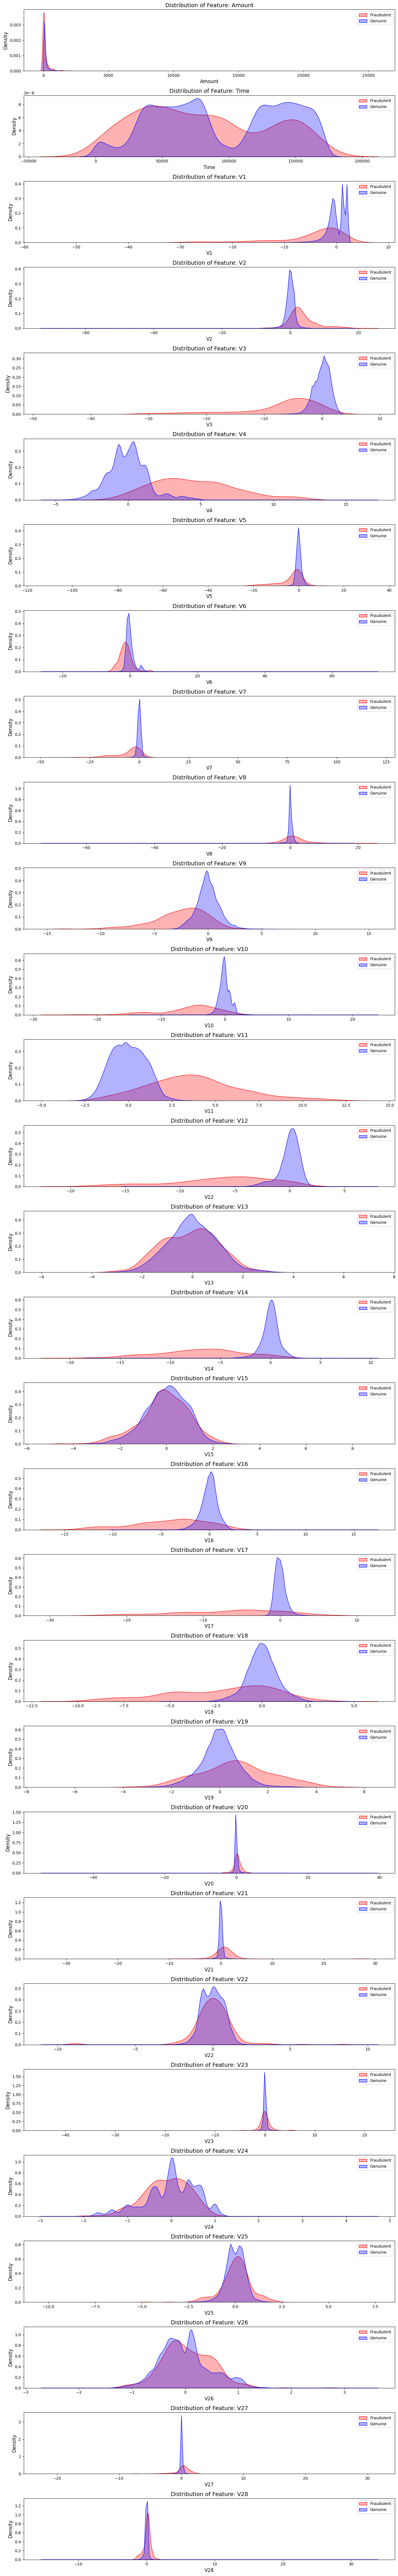

In [23]:
# Sao chép dữ liệu để không thay đổi dataset gốc
data_plot = dataset.copy()

# Đưa cột 'Amount' lên đầu để thuận tiện phân tích
amount = data_plot['Amount']
data_plot.drop(labels=['Amount'], axis=1, inplace=True)
data_plot.insert(0, 'Amount', amount)

# Lấy tên các cột đặc trưng cần vẽ
columns = data_plot.iloc[:, 0:30].columns  # Chỉ lấy các cột đầu tiên (giả định tối đa 30 đặc trưng)

# Cài đặt khung đồ thị
plt.figure(figsize=(14, len(columns) * 3))  # Chiều cao thay đổi dựa trên số lượng cột
grids = gridspec.GridSpec(len(columns), 1)  # Mỗi cột một hàng đồ thị

# Lặp qua từng cột để vẽ phân phối
for grid, col_name in enumerate(columns):
    ax = plt.subplot(grids[grid])
    sns.kdeplot(
        data=data_plot[data_plot.Class == 1], 
        x=col_name, 
        fill=True, 
        color="red", 
        alpha=0.3, 
        label="Fraudulent"
    )
    sns.kdeplot(
        data=data_plot[data_plot.Class == 0], 
        x=col_name, 
        fill=True, 
        color="blue", 
        alpha=0.3, 
        label="Genuine"
    )
    ax.set_title(f"Distribution of Feature: {col_name}", fontsize=14)
    ax.set_xlabel(col_name, fontsize=12)
    ax.set_ylabel("Density", fontsize=12)
    ax.legend(fontsize=10)

# Tự động căn chỉnh bố cục
plt.tight_layout()
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

# Chuẩn hóa đặc trưng (Standardizing 'Amount' và 'Time')
scaler = StandardScaler()
dataset["Amount"] = scaler.fit_transform(dataset["Amount"].values.reshape(-1, 1))
dataset["Time"] = scaler.fit_transform(dataset["Time"].values.reshape(-1, 1))

# *Tạo tập dữ liệu cân bằng*
fraud = dataset[dataset["Class"] == 1]  # Các giao dịch gian lận
genuine = dataset[dataset["Class"] == 0].sample(len(fraud), random_state=42)  # Lấy mẫu lớp Genuine
balanced_data = pd.concat([fraud, genuine])  # Kết hợp lại

# Chia đặc trưng và nhãn
X = balanced_data.drop(columns=["Class"])  # Đặc trưng
y = balanced_data["Class"]  # Nhãn mục tiêu

# Chia tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression
print("\nTraining Logistic Regression...")
lr_model = LogisticRegression(class_weight="balanced", random_state=42)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Random Forest
print("\nTraining Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100, max_depth=5, random_state=42, class_weight="balanced", n_jobs=-1
)  # Giảm n_estimators và max_depth
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Gradient Boosting
print("\nTraining Gradient Boosting...")
gb_model = GradientBoostingClassifier(
    n_estimators=50, learning_rate=0.2, max_depth=5, random_state=42
)  # Giảm n_estimators và tăng learning_rate
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

# *Đánh giá hiệu suất*
models = {"Logistic Regression": lr_preds, "Random Forest": rf_preds, "Gradient Boosting": gb_preds}

for name, preds in models.items():
    print(f"\n--- {name} ---")
    print(classification_report(y_test, preds))
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, preds)}")
    print(f"AUC Score: {roc_auc_score(y_test, preds):.4f}")
    print(f"F1 Score: {f1_score(y_test, preds):.4f}")


Training Logistic Regression...

Training Random Forest...

Training Gradient Boosting...

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        99
           1       0.95      0.95      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

Confusion Matrix:
[[94  5]
 [ 5 93]]
AUC Score: 0.9492
F1 Score: 0.9490

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        99
           1       0.99      0.93      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197

Confusion Matrix:
[[98  1]
 [ 7 91]]
AUC Score: 0.9592
F1 Score: 0.9579

--- Gradient Boosting ---
              precision    recal


--- Logistic Regression Performance ---

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        99
           1       0.95      0.95      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

F1-Score: 0.9490
ROC-AUC Score: 0.9833
Best F1-Score on Precision-Recall Curve: 0.9637


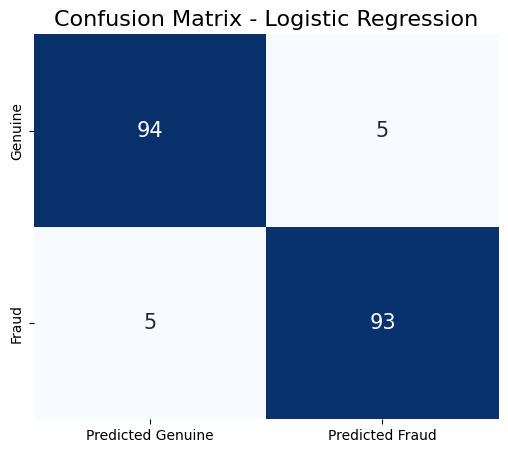


--- Random Forest Performance ---

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        99
           1       0.99      0.93      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197

F1-Score: 0.9579
ROC-AUC Score: 0.9904
Best F1-Score on Precision-Recall Curve: 0.9688


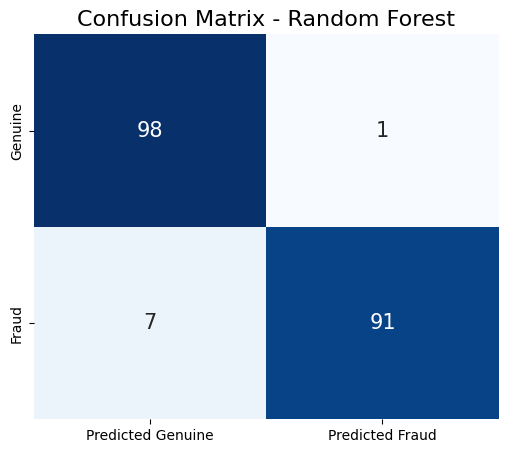


--- Gradient Boosting Performance ---

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        99
           1       0.95      0.96      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

F1-Score: 0.9543
ROC-AUC Score: 0.9868
Best F1-Score on Precision-Recall Curve: 0.9634


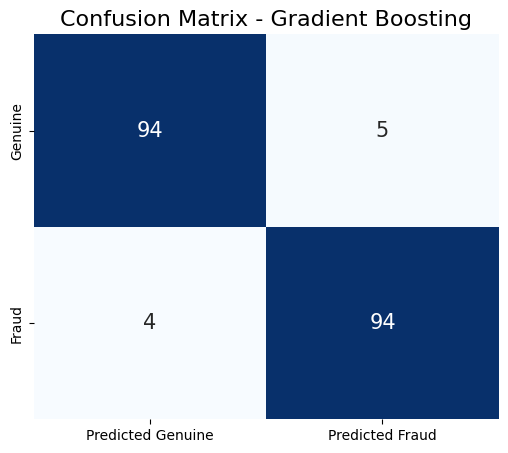


--- Summary of Model Performance ---
                 Model  F1-Score   ROC-AUC  Best PR F1-Score
0  Logistic Regression  0.948980  0.983302          0.963731
1        Random Forest  0.957895  0.990414          0.968750
2    Gradient Boosting  0.954315  0.986807          0.963351

--- Best Model: Random Forest ---
F1-Score: 0.9579
ROC-AUC Score: 0.9904
Best F1-Score on Precision-Recall Curve: 0.9688


In [ ]:
# Hàm đánh giá hiệu suất và chọn mô hình tốt nhất
from sklearn.metrics import precision_recall_curve


def evaluate_and_compare(models, X_test, y_test):
    # Lưu trữ kết quả cho các mô hình
    results = []
    
    for name, model in models.items():
        print(f"\n--- {name} Performance ---")
        
        # Dự đoán nhãn và xác suất
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # Xác suất dự đoán lớp 1

        # Ma trận nhầm lẫn
        cm = confusion_matrix(y_test, y_pred)
        cm_df = pd.DataFrame(cm, index=["Genuine", "Fraud"], columns=["Predicted Genuine", "Predicted Fraud"])
        
        # Báo cáo phân loại
        print("\n--- Classification Report ---")
        print(classification_report(y_test, y_pred))
        
        # Tính toán F1-Score và ROC-AUC Score
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"F1-Score: {f1:.4f}")
        print(f"ROC-AUC Score: {roc_auc:.4f}")
        
        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        prf1 = 2 * (precision * recall) / (precision + recall)
        best_prf1 = np.max(prf1)
        print(f"Best F1-Score on Precision-Recall Curve: {best_prf1:.4f}")
        
        # Lưu trữ kết quả
        results.append({
            "Model": name,
            "F1-Score": f1,
            "ROC-AUC": roc_auc,
            "Best PR F1-Score": best_prf1
        })
        
        # Hiển thị ma trận nhầm lẫn
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 15})
        plt.title(f"Confusion Matrix - {name}", fontsize=16)
        plt.show()
    
    # Chọn mô hình tốt nhất theo ROC-AUC Score
    results_df = pd.DataFrame(results)
    print("\n--- Summary of Model Performance ---")
    print(results_df)
    
    best_model = results_df.loc[results_df['ROC-AUC'].idxmax()]
    print(f"\n--- Best Model: {best_model['Model']} ---")
    print(f"F1-Score: {best_model['F1-Score']:.4f}")
    print(f"ROC-AUC Score: {best_model['ROC-AUC']:.4f}")
    print(f"Best F1-Score on Precision-Recall Curve: {best_model['Best PR F1-Score']:.4f}")

# Sử dụng hàm
models = {
    "Logistic Regression": lr_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model
}

evaluate_and_compare(models, X_test, y_test)
